 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [242]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [243]:
# Reading whale returns

whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [244]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [245]:
# Drop nulls
whale_returns_df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [246]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()




,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [247]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [248]:
# Drop nulls

algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [249]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")

sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.head()



,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [250]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [251]:
# Fix Data Types

sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace("$", "")
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(",", "")
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype('float')




In [252]:
# Calculate Daily Returns

sp_tsx_history_df.sort_index(inplace=True)
daily_returns_df = sp_tsx_history_df.pct_change()
daily_returns_df.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [253]:
# Drop nulls

daily_returns_df.dropna(inplace=True)
daily_returns_df.head()




,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [254]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns_df = daily_returns_df.rename(columns={
    "Close": "S&P TSX 60",
})

daily_returns_df.head()


,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [255]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

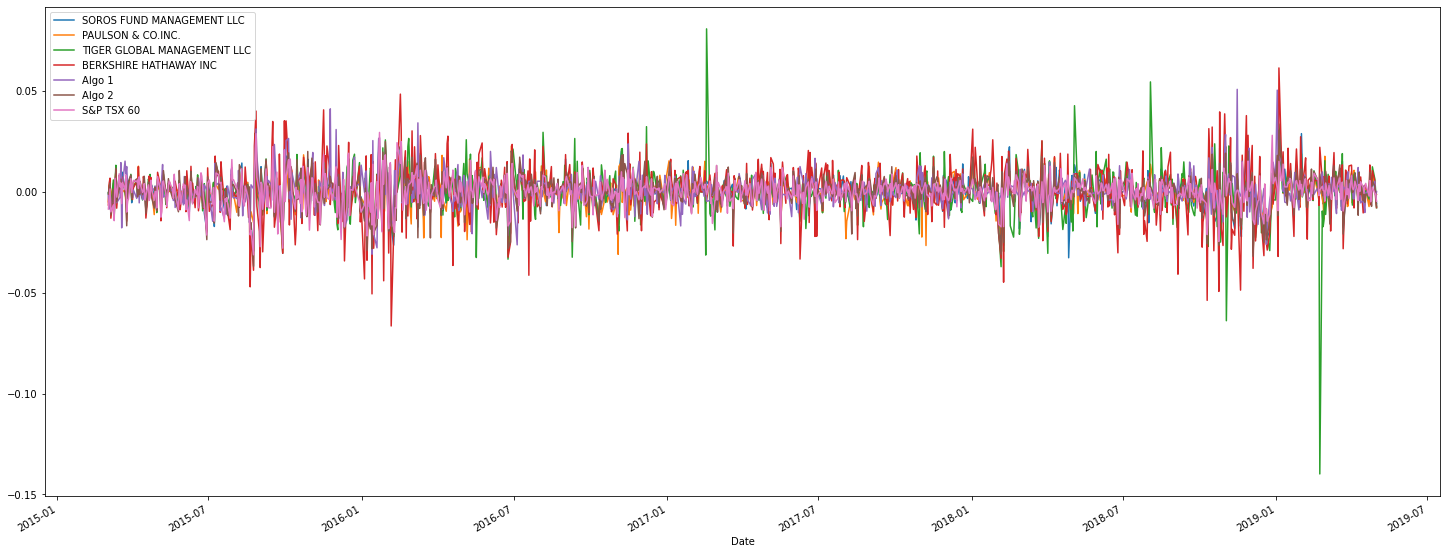

In [256]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(25,10))




#### Calculate and Plot cumulative returns.

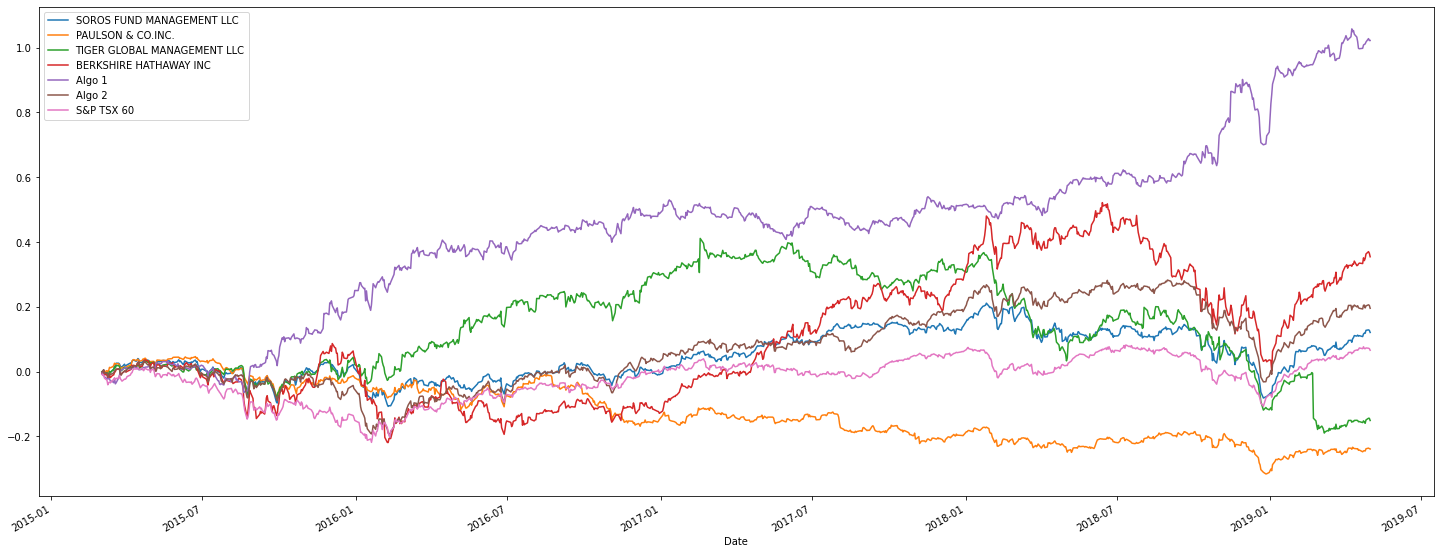

In [257]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns

cumulative_returns.plot(figsize=(25,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


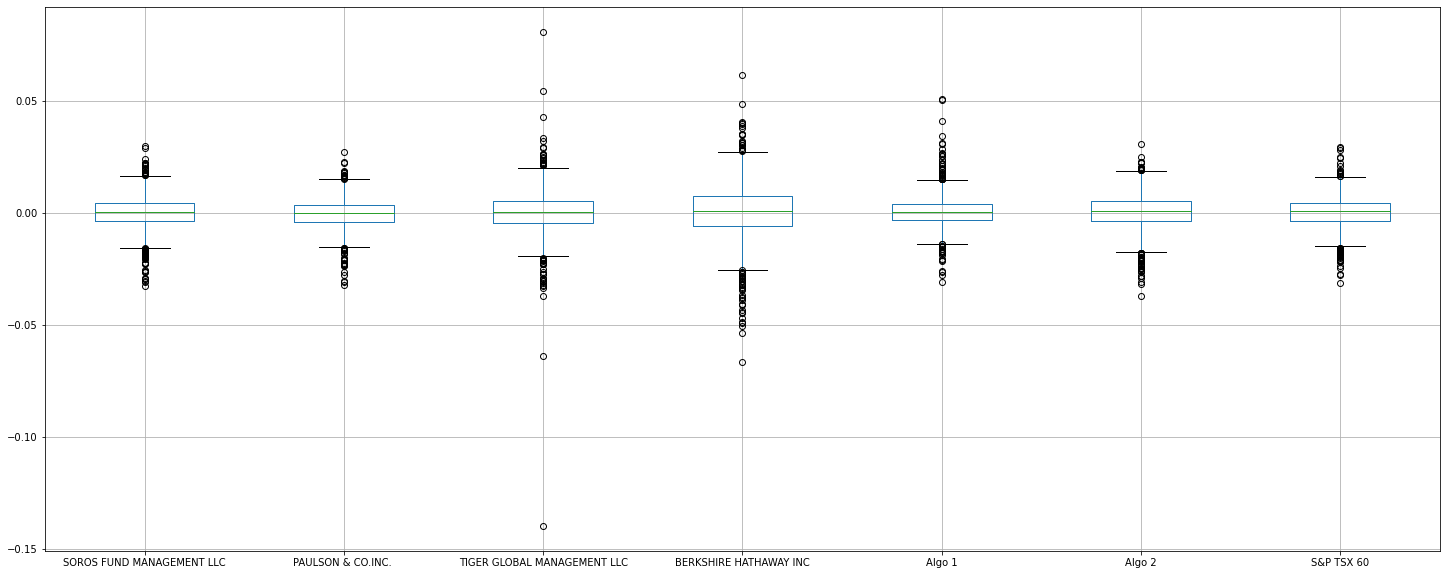

In [258]:
# Box plot to visually show risk

combined_df.boxplot(figsize=(25,10))



### Calculate Standard Deviations

In [259]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_df.std()

daily_std


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [260]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_std = daily_returns_df.std()

# Determine which portfolios are riskier than the S&P TSX 60

more_risky_sp = cumulative_returns.drop(columns=['S&P TSX 60', 'PAULSON & CO.INC. '])
more_risky_sp.head()



,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,
2015-03-03,-0.001266,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.000962,-0.003028,-0.002383,-0.010514,0.001464
2015-03-05,0.004981,-0.000681,0.004327,-0.011459,0.005794
2015-03-06,-0.002963,-0.009156,-0.008828,-0.016359,-0.005733
2015-03-09,-0.002383,-0.003367,-0.010466,-0.021717,-0.004437


### Calculate the Annualized Standard Deviation

In [261]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std



SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

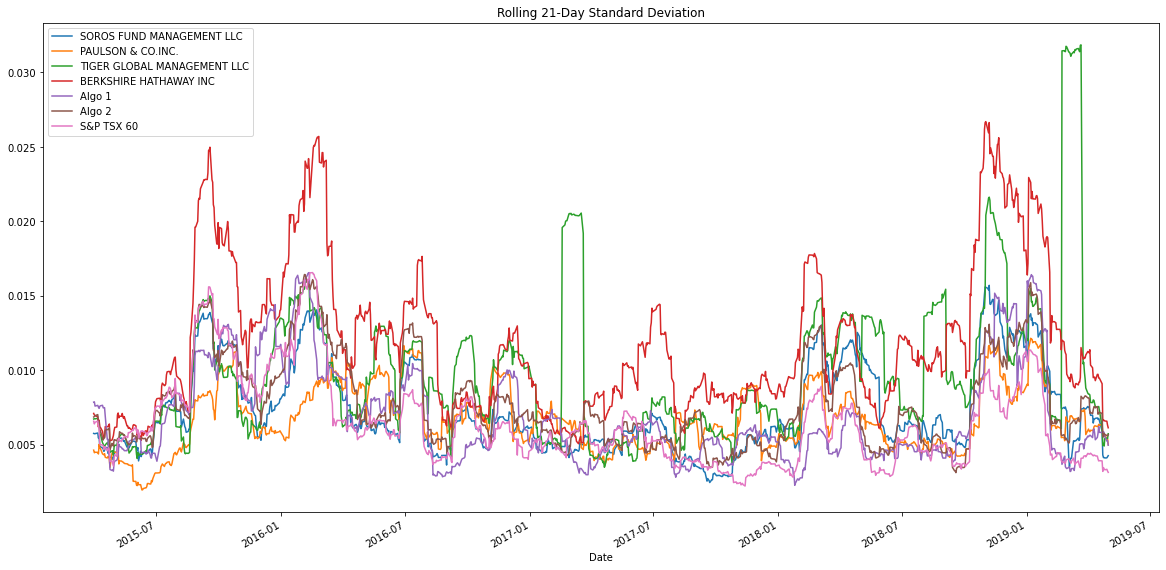

In [262]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_21_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

rolling_21_std.plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')


### Calculate and plot the correlation

In [263]:
# Calculate the correlation

correlation = combined_df.corr()


# Display the correlation matrix

correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

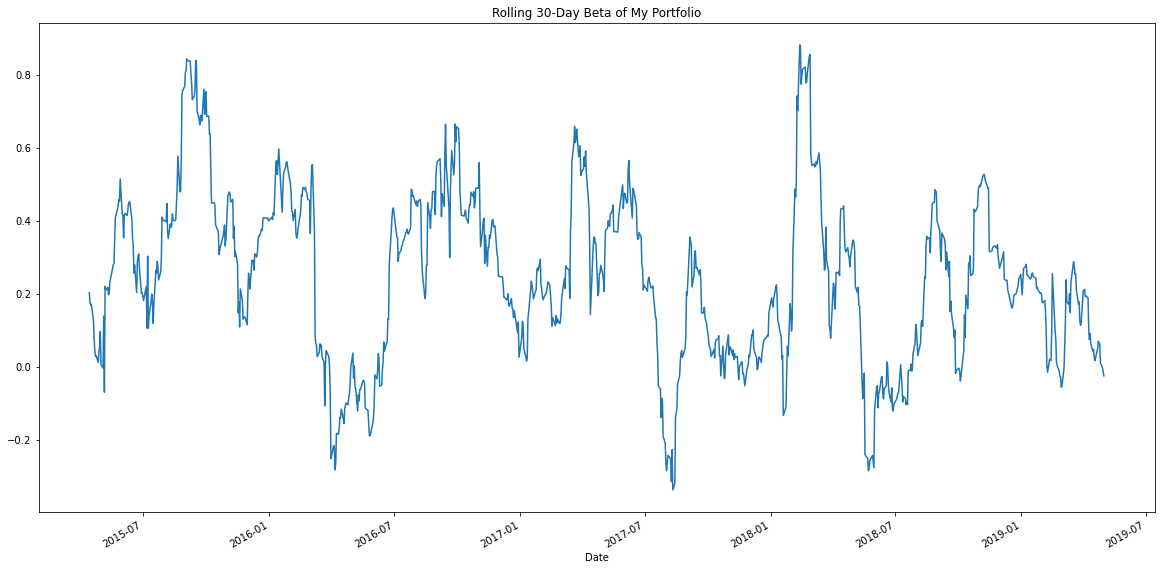

In [264]:
# Calculate covariance of a single portfolio

covariance = combined_df['Algo 1'].cov(combined_df['S&P TSX 60'])

# Calculate variance of S&P TSX

variance = combined_df['S&P TSX 60'].var()

# Computing beta

algo1_beta = covariance / variance
algo1_beta
# Plot beta trend

rolling_covariance_1 = combined_df['Algo 1'].rolling(window=30).cov(combined_df['S&P TSX 60'])
rolling_variance_1 = combined_df['Algo 1'].rolling(window=30).var()
rolling_beta_1 = rolling_covariance_1 / rolling_variance_1
rolling_beta_1.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Portfolio')





## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [265]:
# Use `ewm` to calculate the rolling window

rolling_window = combined_df.ewm(com=None, span=None, halflife=21)

rolling_window


EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [266]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

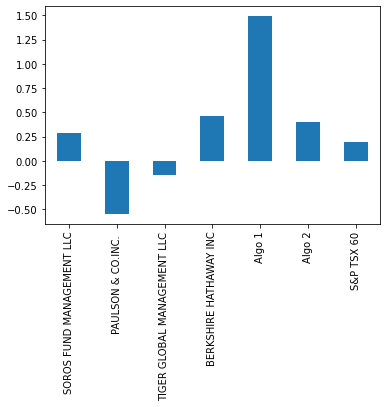

In [267]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar()


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

ALGO 1 outperforms both however ALGO 2 does not outperform BERKSHIRE HATHAWAY

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [268]:
# Reading data from 1st stock

SHOP_path = Path("Resources/shop_historical.csv")
SHOP_returns_df = pd.read_csv(SHOP_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
SHOP_returns_df.head()



,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [269]:
# Reading data from 2nd stock

OTEX_path = Path("Resources/otex_historical.csv")
OTEX_returns_df = pd.read_csv(OTEX_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
OTEX_returns_df.head()



,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [270]:
# Reading data from 3rd stock

L_path = Path("Resources/l_historical.csv")
L_returns_df = pd.read_csv(L_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
L_returns_df.head()



,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [271]:
# Combine all stocks in a single DataFrame


combined_my_df = pd.concat([SHOP_returns_df, OTEX_returns_df, L_returns_df], axis="columns", join="inner")




In [272]:
# Reset Date index
combined_my_df.sort_index(inplace=True)

combined_my_df.head()



,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [273]:
# Reorganize portfolio data by having a column per symbol

combined_my_df.drop(columns=['Symbol', 'Symbol' , 'Symbol'], inplace = True )

combined_my_df.columns = ['SHOP', 'OTEX' , "L"]




In [274]:
# Calculate daily returns

daily_returns = combined_my_df.pct_change()
daily_returns.head()


# Drop NAs

daily_returns.dropna(inplace=True)


# Display sample data

daily_returns


,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [275]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data

portfolio_returns.head()



Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [276]:
# Join your returns DataFrame to the original returns DataFrame

combined_portfolio_df = pd.concat([combined_df, portfolio_returns ], axis="columns", join="inner")

combined_portfolio_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [277]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


combined_portfolio_df.dropna(inplace=True)

combined_portfolio_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [278]:
# Calculate the annualized `std`

sp_std_combined = combined_portfolio_df.std()

annualized_std_combined = sp_std_combined * np.sqrt(252)
annualized_std_combined


SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
0                              0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

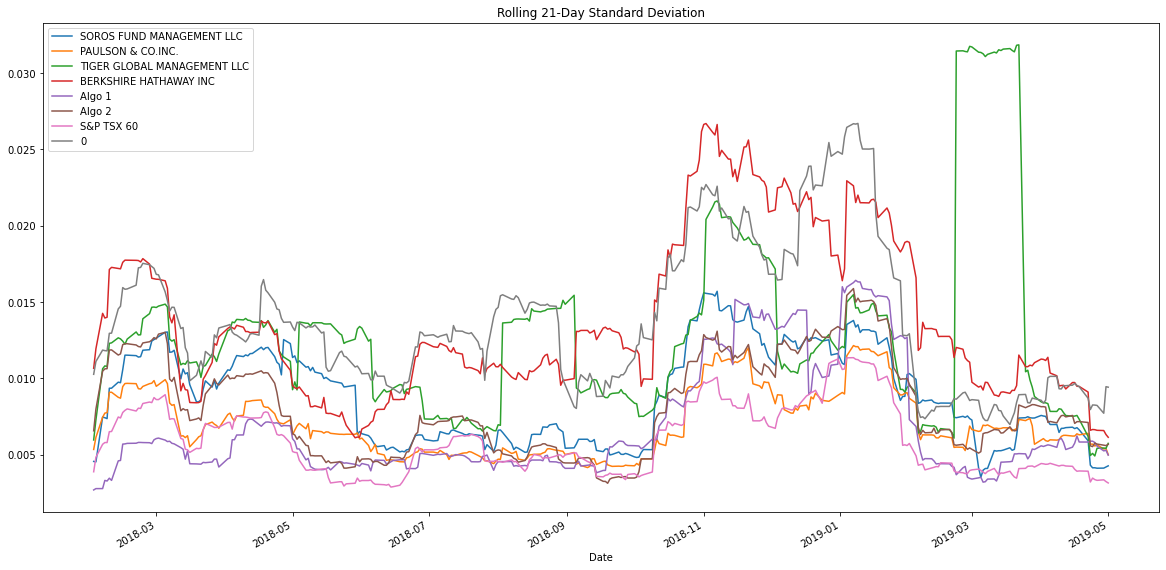

In [279]:
# Calculate rolling standard deviation

rolling_21_std_combined = combined_portfolio_df.rolling(window=21).std()

# Plot the rolling standard deviation

rolling_21_std_combined.plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')


### Calculate and plot the correlation

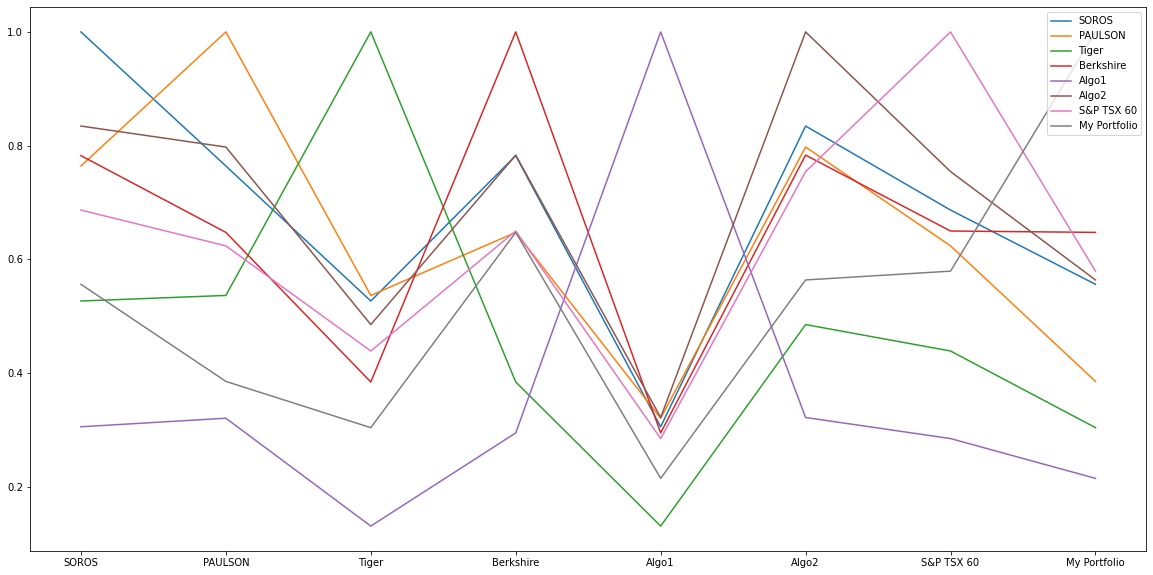

In [282]:
# Calculate and plot the correlation



combined_portfolio_df.columns = ['SOROS', 'PAULSON' , "Tiger", "Berkshire", "Algo1" , "Algo2" , "S&P TSX 60", "My Portfolio" ]
correlation = combined_portfolio_df.corr()
correlation.plot(figsize=(20, 10))


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

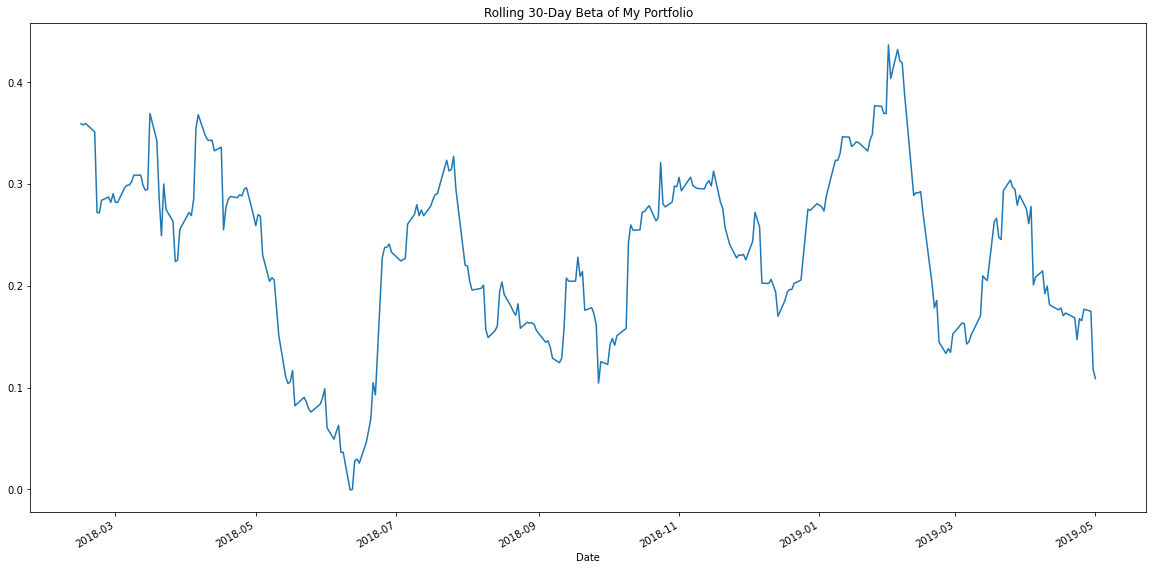

In [283]:
# Calculate and plot Beta

variance = combined_portfolio_df['My Portfolio'].var()
#variance

covariance = combined_portfolio_df['My Portfolio'].cov(combined_df['S&P TSX 60'])

beta = covariance/variance
beta

rolling_covariance = combined_portfolio_df['My Portfolio'].rolling(window=30).cov(combined_portfolio_df['S&P TSX 60'])
rolling_variance = combined_portfolio_df['My Portfolio'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Portfolio')






### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios = (combined_portfolio_df.mean() * 252) / (combined_portfolio_df.std() * np.sqrt(252))
sharpe_ratios




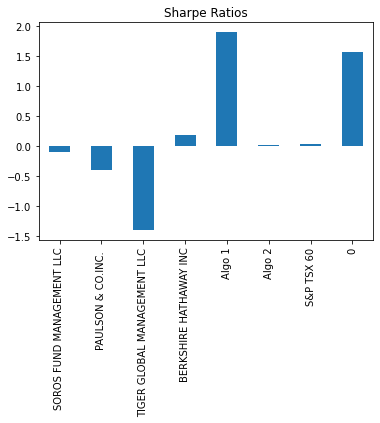

In [213]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")




### How does your portfolio do?

Write your answer here!

In [215]:
#It does really well however Algo1 is the best option